# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Tri Santoso]
- **Email:** [trysantos.L@gmail.com]
- **ID Dicoding:** [try-san]

## Menentukan Pertanyaan Bisnis

- Customer dari city mana yang paling banyak order?
- Customer dari state mana yang paling banyak order?

## Import Semua Packages/Library yang Digunakan

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SyntaxError: invalid syntax (<ipython-input-11-02d7a0676b34>, line 1)

## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv("customers_dataset.csv", delimiter=",")
customers_df.head()
orders_df = pd.read_csv("orders_dataset.csv", delimiter=",")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Tabel customers memiliki beberapa kolom, diantaranya: customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state
- Tabel orders memiliki beberapa kolom, diantaranya: order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

### Assessing Data

In [7]:
customers_df.info()
customers_df.describe()
customers_df.isnull().sum()
customers_df.duplicated().sum()

orders_df.info()
orders_df.describe()
orders_df.isnull().sum()
orders_df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_t

0

**Insight:**
- Pada tabel cutomers tidak ada Missing value, tidak ada data duplikat, tidak ada keanehan pada tipe data
- Pada tabel orders terdapat Missing value, tidak ada data duplikat, terdapat kesalahan pada tipe data pada kolom: order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

### Cleaning Data

In [6]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.order_approved_at.value_counts()
orders_df.fillna(value="2018-02-27 04:31:10", inplace=True)
orders_df.isnull().sum()

median_order_approved_at = orders_df['order_approved_at'].median()
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(median_order_approved_at)
print(orders_df)

median_order_delivered_carrier_date = orders_df['order_delivered_carrier_date'].median()
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(median_order_delivered_carrier_date)
print(orders_df)

median_order_delivered_customer_date = orders_df['order_delivered_customer_date'].median()
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(median_order_delivered_customer_date)
print(orders_df)

                               order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0       

**Insight:**
- Tipe data dari: order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date sudah di ubah menjadi datetime
- Missing value sudah diatasi dengan mengambil nilai median dan mengisinya pada kolom yang kosong

## Exploratory Data Analysis (EDA)

### Explore ...

In [36]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**Insight:**
- Dari data yang tampil, customer paling banyak berasal dari kota "sao paulo", disusul dengan kota "rio de janeiro", lalu dibawahnya ada kota "belo horizonte". Hal ini menandakan bahwa kota "sao paulo" lebih menyukai poduk-produk yang dijual.
- Dari data yang tampil, status order paling banyak adalah "delivered", disusul dengan status "shipped", lalu dibawahnya ada status "canceled". Hal ini menandakan bahwa lebih banyak transaksi yang terselesaikan dengan baik.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-42-445740aaf4fb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_city", y="order_id", data=group_df.head(), palette=colors)


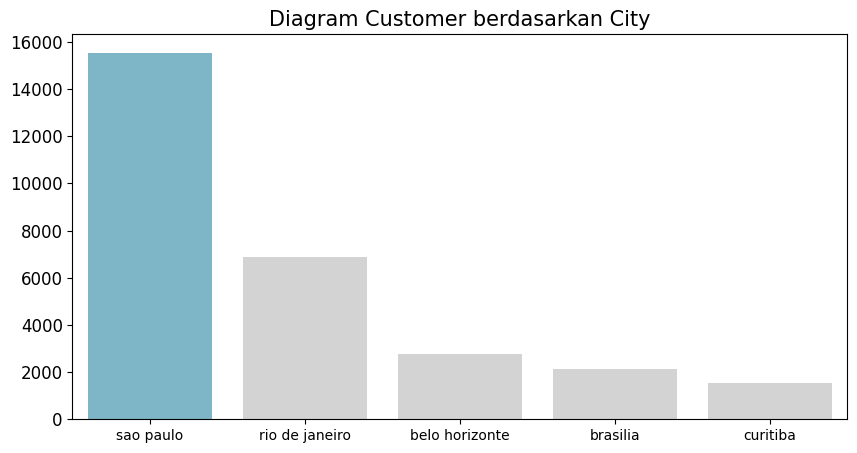

In [42]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)


group_df = orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)
group_df.head()

plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="customer_city", y="order_id", data=group_df.head(), palette=colors)
plt.title("Diagram Customer berdasarkan City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

### Pertanyaan 2:

<ipython-input-43-31d3942225bb>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_state", y="order_id", data=group_df.head(), palette=colors)


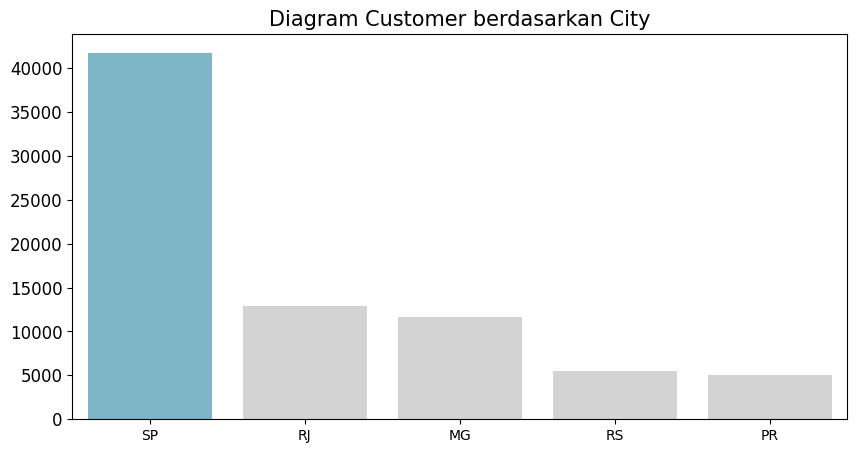

In [43]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

group_df = orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)
group_df.head()

plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x="customer_state", y="order_id", data=group_df.head(), palette=colors)
plt.title("Diagram Customer berdasarkan City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Customer paling banyak melakukan order berasal dari city "sao paulo", hal ini berarti selera disana sesuai dengan produk yang dijual.
- Customer paling banyak melakukan order berasal dari state SP, hal ini bisa memunculkan peluang jika melakukan promosi di state tersebut.

## Analisis Lanjutan (Opsional)

In [ ]:
customers_df.to_csv("all_data_customers.csv", index=False)
orders_df.to_csv("all_data_orders.csv", index=False)
orders_customers_df.to_csv("all_data_orders_customers.csv", index=False)

## Conclusion

- Dari data yang ada, customer paling banyak berasal dari city "sao paulo", dikota tersebut juga terjadi transaksi terbanyak pula. Jika membangun beberapa cabang disana, kemungkinan besar akan meningkatkan pemasukan.
- Selain itu, secara spesifik state SP juga merupakan state dengan jumlah transaksi terbanyak. Hal ini menjadikan state SP merupakan tempat ideal untuk melakukan promosi.